<a href="https://colab.research.google.com/github/Bahrombekk/OpenCV/blob/main/Copy_of_DICE_COUNT_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O img.jpg https://github.com/Naxalov/ComputerVision/raw/master/dice/dice.png 

--2023-05-19 10:33:23--  https://github.com/Naxalov/ComputerVision/raw/master/dice/dice.png
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Naxalov/ComputerVision/master/dice/dice.png [following]
--2023-05-19 10:33:24--  https://raw.githubusercontent.com/Naxalov/ComputerVision/master/dice/dice.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3504421 (3.3M) [image/png]
Saving to: ‘img.jpg’

img.jpg             100%[===================>]   3.34M  --.-KB/s    in 0.09s   

2023-05-19 10:33:25 (38.0 MB/s) - ‘img.jpg’ saved [3504421/3504421]



In [2]:

!wget https://github.com/Naxalov/ComputerVision/raw/master/dice/dice_6_4_1.png 

--2023-05-19 10:33:25--  https://github.com/Naxalov/ComputerVision/raw/master/dice/dice_6_4_1.png
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Naxalov/ComputerVision/master/dice/dice_6_4_1.png [following]
--2023-05-19 10:33:25--  https://raw.githubusercontent.com/Naxalov/ComputerVision/master/dice/dice_6_4_1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 277596 (271K) [image/png]
Saving to: ‘dice_6_4_1.png’

dice_6_4_1.png      100%[===================>] 271.09K  --.-KB/s    in 0.04s   

2023-05-19 10:33:26 (7.10 MB/s) - ‘dice_6_4_1.png’ saved [277596/277596]



In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import json
from random import randint

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

In [4]:
# utility 
def show(img,s=8,b=False):
  plt.figure(figsize=(s,s))
  plt.imshow(img,cmap='gray')
  plt.grid(alpha=.2)
  plt.grid(b)
  plt.show()

In [5]:
def get_img(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  # gray = cv2.blur(gray,(8,8))
  return img,gray

In [6]:
dice1,gray_dice1 = get_img('dice_6_4_1.png')

In [7]:
def img_threshold(gray_img):
  """
  Threshold image
  """
  # WRITE YOUR CODE HERE
  thresh_imgg = cv2.inRange(gray_img,220,255,cv2.THRESH_BINARY)
  return thresh_imgg


In [8]:
thresh_img = img_threshold(gray_dice1)

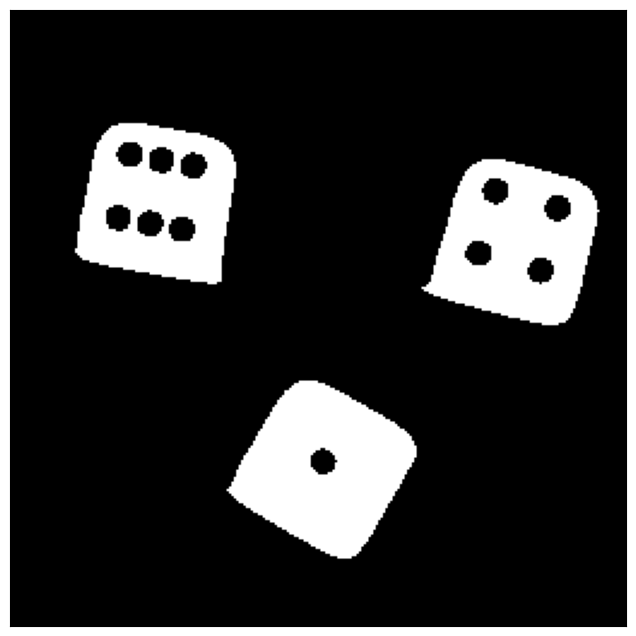

In [9]:
show(thresh_img)

In [10]:
contours,hierarchy = cv2.findContours(thresh_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_TC89_L1) # WRITE YOUR CODE HERE

In [11]:
draw = dice1.copy()
draw = cv2.drawContours(draw,contours,0,(255,0,0),1)

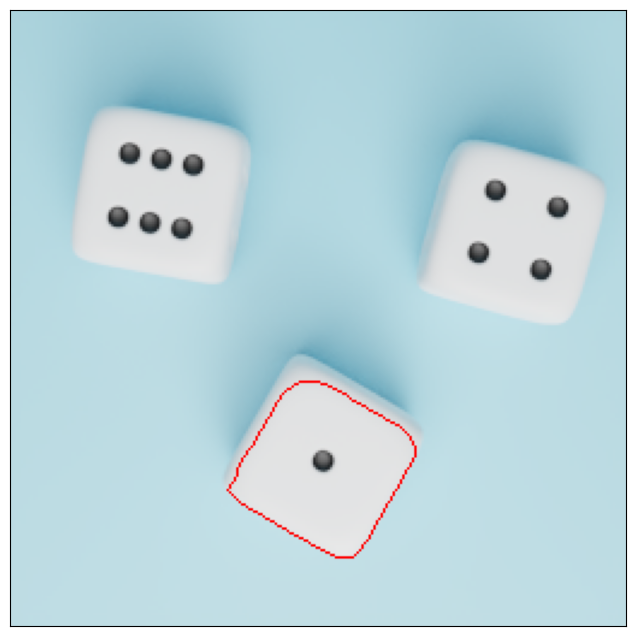

In [12]:
show(draw)

In [13]:
hierarchy

array([[[ 2, -1,  1, -1],
        [-1, -1, -1,  0],
        [ 7,  0,  3, -1],
        [ 4, -1, -1,  2],
        [ 5,  3, -1,  2],
        [ 6,  4, -1,  2],
        [-1,  5, -1,  2],
        [-1,  2,  8, -1],
        [ 9, -1, -1,  7],
        [10,  8, -1,  7],
        [11,  9, -1,  7],
        [12, 10, -1,  7],
        [13, 11, -1,  7],
        [-1, 12, -1,  7]]], dtype=int32)

In [14]:
def count_dice_point(hierarchy):
  """
  hierarchy for findContours

  Args:
    hierarchy(ndarray):hierarchy coundours
  Returns:
    Dict: split parent and child dictionary
  """

  parent_child_dict = {}
  k=0
  for i in hierarchy[0]:
    if i[-2]!=-1:
      parent_child_dict[i[-2]-1]=[]
    if i[-1]!=-1:
      parent_child_dict[i[-1]].append(k)
    k+=1

  

  # WRITE YOUR CODE HERE
  return parent_child_dict


In [15]:
parent_child_dict = count_dice_point(hierarchy)

In [16]:
print(parent_child_dict)

{0: [1], 2: [3, 4, 5, 6], 7: [8, 9, 10, 11, 12, 13]}


In [17]:
parent_child_dict

{0: [1], 2: [3, 4, 5, 6], 7: [8, 9, 10, 11, 12, 13]}

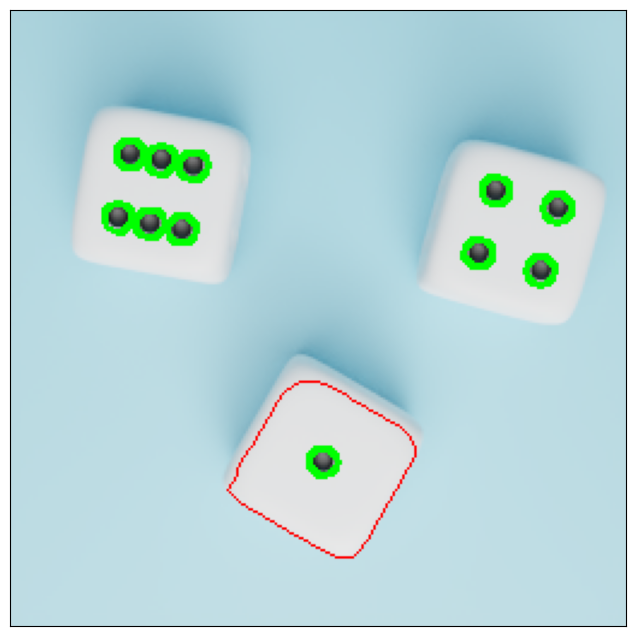

In [20]:
l=[]
l1=[]
for i in parent_child_dict.keys():
  l.append(i)
for j in parent_child_dict.values():
  if i and j:
    for i in j:
      l1.append(i)
      for i in l1:
        draw = cv2.drawContours(draw,contours,i,(0,255,0),2)
show(draw)

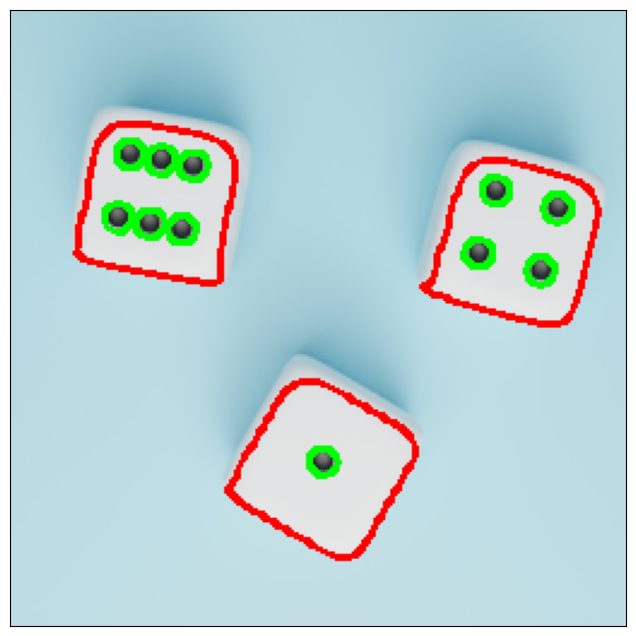

In [22]:
for i in hierarchy[0]:
  if i[-2]!=-1:
    a=i[-2]-1
  draw = cv2.drawContours(draw,contours,a,(255,0,0),2)
show(draw)

1
4
6


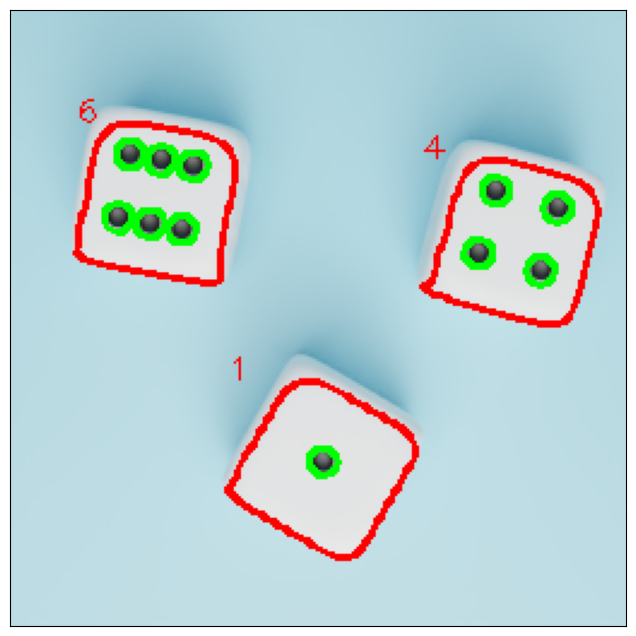

In [24]:
def draw_dice_count_img(draw_img, parent_child_dict):
  """
  Draw Dice counting
  """
  # WRITE YOUR CODE HERE
  for i in parent_child_dict:
    print(len(parent_child_dict[i]))
    x,y,w,h = cv2.boundingRect(contours[i])
    draw_img = cv2.putText(draw_img,f"{len(parent_child_dict[i])}",(x,y),1,1,(255,0,0))
  show(draw_img)

draw_img = dice1.copy()
draw_dice_count_img(draw, parent_child_dict)

1
4
6


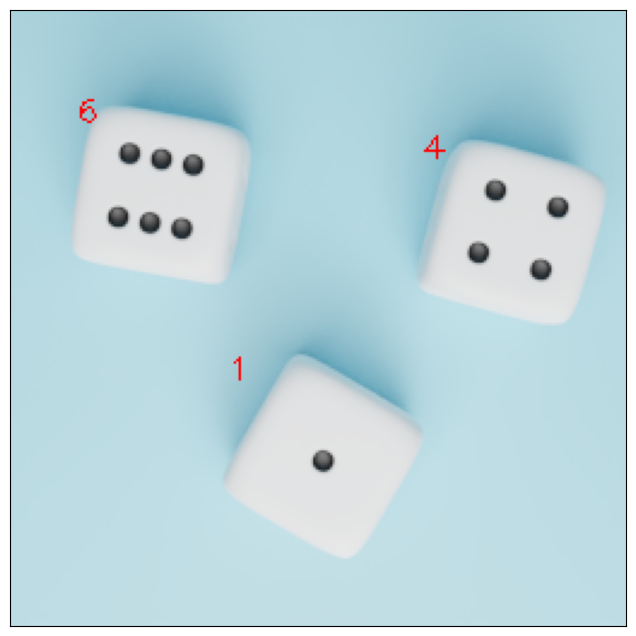

In [19]:
draw_img = dice1.copy()
draw_dice_count_img(draw_img, parent_child_dict)